<a href="https://colab.research.google.com/github/hardik1408/Campus-fora-backend/blob/main/bihar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the dataset

In [71]:
import pandas as pd

# Load your dataset ')
data = pd.read_csv('bihar.csv')

# Transpose the dataset to make days as rows and time intervals as columns
data = data.T

# Set the first row as column names
data.rows = data.iloc[0]
data = data[1:]

# Convert the date index to datetime objects
data.index = pd.to_datetime(data.index)

# Resample the data to daily frequency and sum the power consumption for each day
daily_data = data.resample('D').sum()

# Visualize the first few rows of the preprocessed data
daily_data


<ipython-input-71-4b2b8db21b37>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.rows = data.iloc[0]


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2023-04-13,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
2023-04-14,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
2023-04-15,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,...,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13
2023-04-16,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,0.13,...,3.97,2.43,0.70,1.02,1.09,0.90,0.58,0.38,0.32,0.90
2023-04-17,3.26,4.86,5.44,5.44,5.18,1.41,0.58,0.32,0.32,0.38,...,4.54,4.74,4.67,4.86,3.26,2.82,4.61,4.35,3.71,2.37
2023-04-18,0.32,0.32,0.32,1.15,4.10,2.82,4.35,2.50,0.58,0.32,...,3.20,3.52,0.64,0.58,0.32,1.79,2.88,3.26,3.01,3.90
2023-04-19,3.26,1.86,2.05,0.77,0.32,0.32,0.32,0.32,0.32,0.32,...,0.70,0.38,0.38,0.32,0.90,2.69,3.90,4.10,4.10,3.78
2023-04-20,2.24,2.69,1.02,0.32,0.32,0.32,0.32,0.32,0.32,0.32,...,0.58,0.32,0.32,0.32,0.32,0.32,0.32,1.79,2.11,2.69
2023-04-21,3.65,4.54,6.02,3.65,4.54,2.50,2.75,4.67,3.90,3.90,...,0.45,0.58,1.79,2.05,2.88,2.69,1.47,3.71,3.20,1.86
2023-04-22,1.73,2.62,3.84,4.03,4.35,3.39,3.26,1.60,1.66,0.64,...,3.14,3.01,4.67,3.14,5.95,5.18,4.80,6.14,1.98,3.71


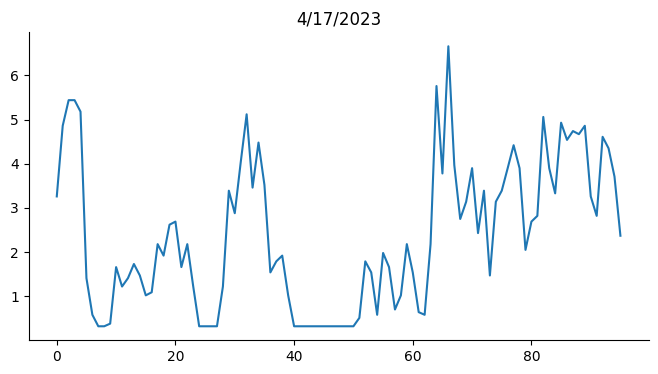

In [32]:
from matplotlib import pyplot as plt
data['4/17/2023'].plot(kind='line', figsize=(8, 4), title='4/17/2023')
plt.gca().spines[['top', 'right']].set_visible(False)

# Model Selection and Training

In [72]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Create and fit the VAR model
model = VAR(daily_data)
model_fit = model.fit()

# Specify the number of steps ahead for forecasting
steps = len(daily_data)  # Forecast for the entire length of the dataset

# Prepare the new day's data
last_observed_day = daily_data.iloc[-1].values
new_day_data = last_observed_day.reshape(1, -1)

# Use the trained model to forecast the new day's data
forecasted_values = model_fit.forecast(y=new_day_data, steps=1)

forecasted_values


array([[   2.39868661,    0.7075233 ,   -1.36336837,   -1.78465024,
          -1.12608706,    2.62599814,    6.29509402,    3.28279342,
           1.32785375,   -0.6469287 ,   -1.24939287,   -2.44920389,
          -0.82501826,    1.66856818,    2.32653118,    5.80182057,
           7.49105997,    8.38357211,    8.5600554 ,    6.95729444,
           4.43411177,    5.06837493,    5.6303968 ,    7.00860593,
           6.67134027,    5.28554122,    3.10878397,    3.44931154,
           1.73159858,    3.31760176,    4.35196498,    4.95365613,
           4.1036558 ,    3.65160506,    3.04233399,    1.56082694,
           2.44043517,    2.68862403,    2.53592741,    3.42437356,
           4.15149569,    1.03579328,    1.60334324,    3.95292921,
           2.11690894,    3.23153671,    0.17085101,    1.17280118,
           3.07769403,    3.20116179,    1.91680538,    2.20086555,
          -3.90612354,   -1.1648377 ,   -2.80385471,   -1.8884589 ,
          -0.19821979,  -37.0821918 ,  -56.43951

#  Prediction

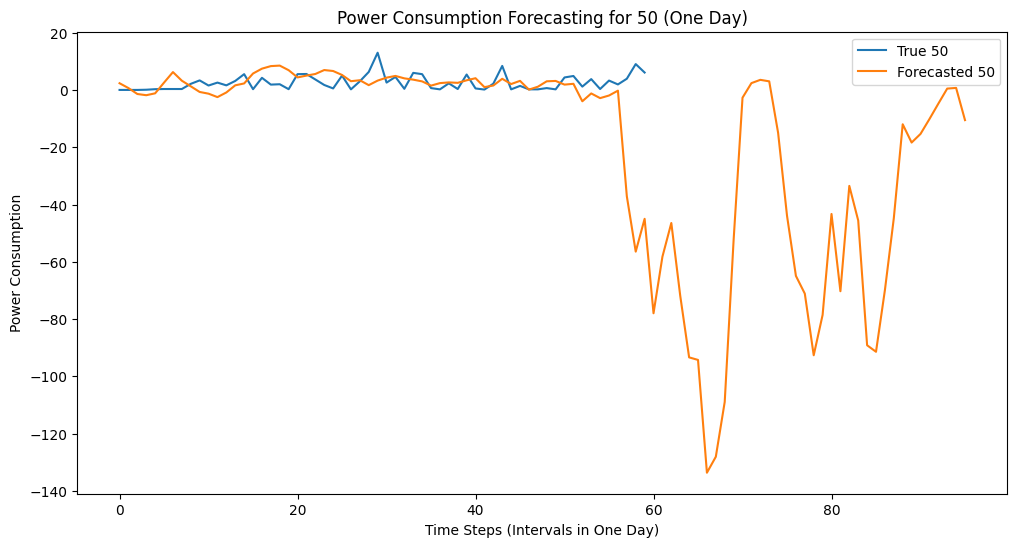

In [73]:
variable_to_plot = 50
plt.figure(figsize=(12, 6))
true_values = daily_data[variable_to_plot].values
forecasted = forecasted_values[0]
plt.plot(true_values, label=f"True {variable_to_plot}")
plt.plot(forecasted, label=f"Forecasted {variable_to_plot}")
plt.legend()
plt.title(f"Power Consumption Forecasting for {variable_to_plot} (One Day)")
plt.xlabel("Time Steps (Intervals in One Day)")
plt.ylabel("Power Consumption")
plt.show()
